In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [4]:
len(df['name'].unique())

8792

In [5]:
# np.round(df.isnull().sum()/len(df)*100,2)
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
features_with_null_values = [feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_null_values

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
#percentage of missing values in particular feature
for feature in features_with_null_values:
    print('% of missing values in {} : {} %'.format(feature,np.round(df[feature].isnull().sum()/len(df[feature])*100,2)))

% of missing values in rate : 15.03 %
% of missing values in phone : 2.34 %
% of missing values in location : 0.04 %
% of missing values in rest_type : 0.44 %
% of missing values in dish_liked : 54.29 %
% of missing values in cuisines : 0.09 %
% of missing values in approx_cost(for two people) : 0.67 %


In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df.shape

(51717, 17)

In [10]:
df.dropna(axis='index', subset=['rate'], inplace=True)

In [11]:
df.shape

(43942, 17)

In [12]:
df['rate'] = df['rate'].apply(lambda x : x.split('/')[0])
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
df.replace(['NEW', '-'],0,inplace=True)
df['rate']=df['rate'].astype(float)

In [14]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

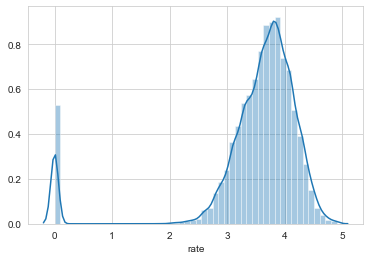

In [15]:
sns.set_style(style='whitegrid')
sns.distplot(df['rate'])

Rating distribution

### Top 15 resturants raing-wise

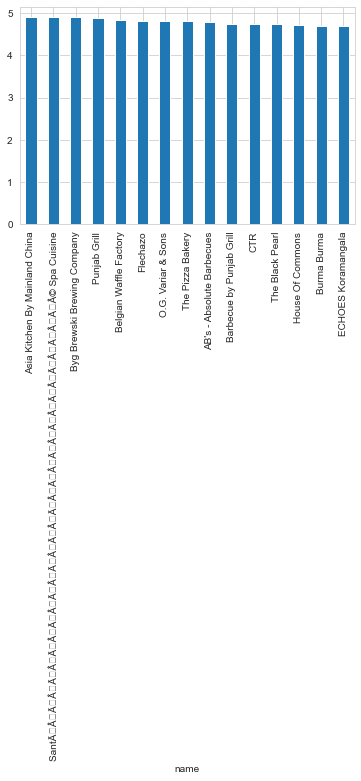

In [16]:
df.groupby('name')['rate'].mean().nlargest(15).plot.bar()

### Mean ratings for every restaurant

In [17]:
mean_ratings = df.groupby('name')['rate'].mean().to_frame()

mean_ratings = mean_ratings.reset_index()                                  # PTBN, otherwise it will make restaurant index
mean_ratings.index = mean_ratings.index + 1

# mean_ratings.index = np.arange(1, len(df['name'].unique())+1)

mean_ratings.columns = ['restaurant','rating']
mean_ratings.head(15)

,restaurant,rating
1,#FeelTheROLL,3.400000
2,#L-81 Cafe,3.900000
3,#refuel,3.700000
4,1000 B.C,3.200000
5,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
6,11 to 11 Express Biriyanis,3.500000
7,1131 Bar + Kitchen,4.500000
8,12th Main - Grand Mercure,4.100000
9,1441 Pizzeria,4.100000
10,1522 - The Pub,4.212000


Text(0.5, 0, 'Number of outlets')

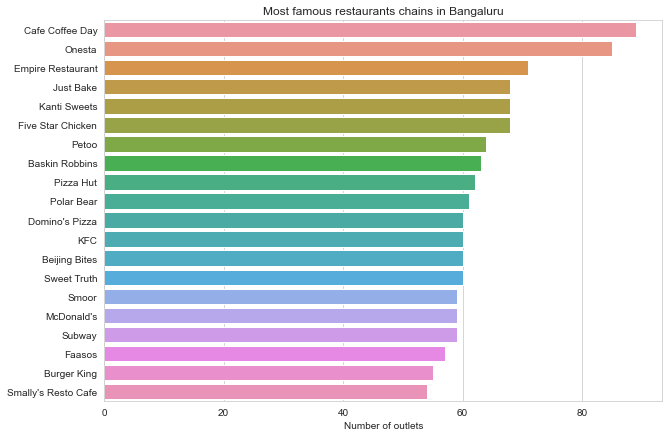

In [18]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)                                                 # palette='deep' for solid colors
# sns.barplot(x=chains.index, y=chains)  
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

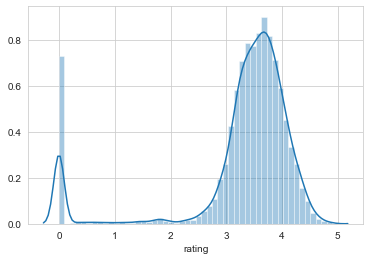

In [19]:
sns.set_style(style='whitegrid')
sns.distplot(mean_ratings['rating'])

### Number of votes for every rating

In [20]:
df.groupby(by=["rate"]).sum()
# df.groupby(by=["name","rate"]).sum()

,votes
rate,
0.0,0
1.8,1123
2.0,4091
2.1,7116
2.2,7435
2.3,9395
2.4,11282
2.5,15822
2.6,29683


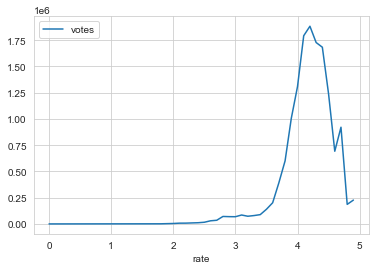

In [21]:
df.groupby(["rate"]).sum().plot()

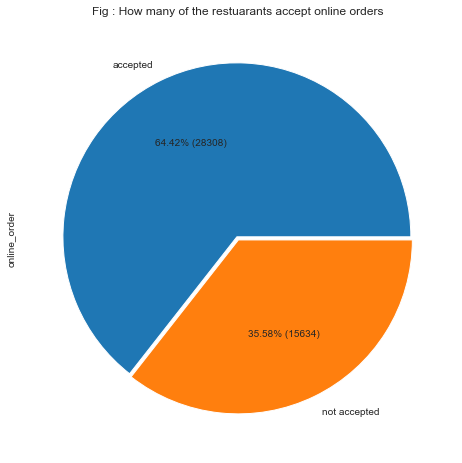

In [37]:
x=df['online_order'].value_counts()

# labels=['accepted','not accepted']
# plt.pie(x, autopct='%.2f')

x.plot(kind='pie', explode=[0.01, 0.01], title='Fig : How many of the restuarants accept online orders',
       labels=['accepted','not accepted'], figsize=[8,8], autopct=lambda y: '{:.2f}% ({:.0f})'.format(y,(y/100)*x.sum()))
plt.show()

## Using plotly

In [41]:
import plotly.express as px

In [58]:
x=df['online_order'].value_counts()

fig = px.pie(values=x, title='Pie chart')
fig.show()

## types of restaurants we have

In [90]:
(df['rest_type'].value_counts()/len(df['rest_type']))*100

Quick Bites                  34.302035
Casual Dining                22.582040
Cafe                          8.026489
Dessert Parlor                4.412635
Delivery                      4.075827
                               ...    
Dessert Parlor, Kiosk         0.004551
Food Court, Beverage Shop     0.004551
Bakery, Beverage Shop         0.004551
Cafe, Food Court              0.004551
Quick Bites, Kiosk            0.002276
Name: rest_type, Length: 87, dtype: float64

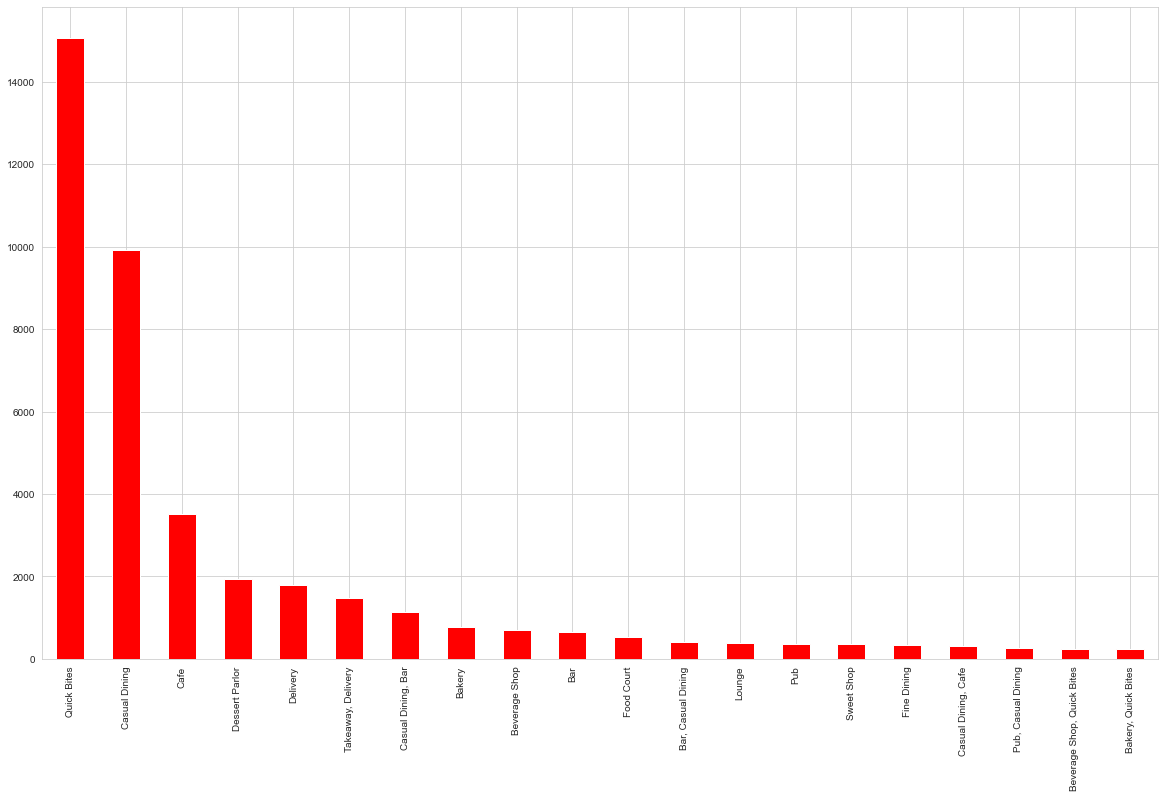

In [64]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts()[:20].plot.bar(color='red')
plt.show()
# plt.gcf().autofmt_xdate()

#### using plotly

In [67]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [68]:
iplot([trace1])

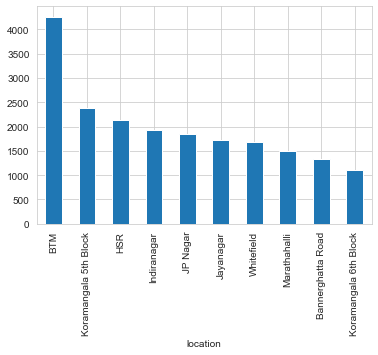

In [72]:
df.groupby('location')['name'].count().nlargest(10).plot.bar()

#### maximum no. of restraunts are in BTM, but we have to find no. of unique restraunts at locations

In [85]:
# df_restrunts_locations = pd.DataFrame(df.groupby('location')['name'].unique().count())

restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))
    
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


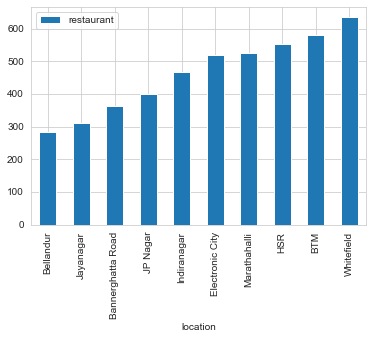

In [86]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [91]:
graph1 = go.Bar( 
        x = df_total['restaurant'].nlargest(15).index,
        y = df_total['restaurant'].nlargest(15),
        name= 'Priority')
iplot([graph1])

## Most popular cuisines

Text(0.5, 1.0, 'Most popular cuisines in Bangalore')

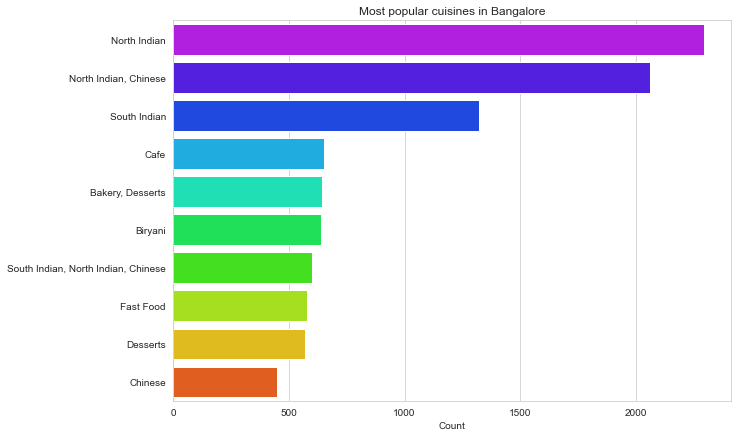

In [129]:
plt.figure(figsize=(10,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index, palette="gist_rainbow_r")
plt.xlabel('Count')
plt.title("Most popular cuisines in Bangalore")

In [131]:
''' supported palette are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu',
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r',
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic',
'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
'tab20c_r', 'terrain', 'terrain_r', 'twilight','twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',
'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r' '''

" supported palette are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', \n'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', \n'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu',\n'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',\n'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',\n'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', \n'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',\n'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',